# Yelp Rating Regression Predictor

# 1 Introduction

When deciding where to eat, I'll often use `Yelp`: a crowd-sourced review service where users can rate restaurants on a scale from 1 to 5 stars (5 being the best possible rating.) Considering that a restaurant's success is highly correlated with its reputation, it can be useful to understand the underlying features that can affect its online perception. 

In this project, I will use a Multiple Linear Regression model to investigate the features that most directly affect a restaurant's Yelp rating and consequently use these features to predict Yelp ratings of hypothetical restaurants.

### 1.1 Goal:
* Demonstrate how a Multiple Linear Regression model can be used to predict a restaurant's Yelp rating 

### 1.2 Approach:
* Perform statistical analysis on a real Yelp dataset comprised of 6 `json` files.
    * `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
    * `yelp_review.json`: Yelp review metadata by business
    * `yelp_user.json`: user profile metadata by business
    * `yelp_checkin.json`: online checkin metadata by business
    * `yelp_tip.json`: tip metadata by business
    * `yelp_photo.json`: photo metadata by business

### 1.3 Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 60
pd.options.display.max_rows = 500

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Visualizations
%matplotlib inline
import matplotlib.pyplot as plt

# 2 Data Cleaning

### 2.1 Load the Data

First, let's use Pandas to investigate the data in DataFrame form.

In [2]:
businesses = pd.read_json('yelp_business.json',lines=True)
reviews = pd.read_json('yelp_review.json',lines=True)
users = pd.read_json('yelp_user.json',lines=True)
checkins = pd.read_json('yelp_checkin.json',lines=True)
tips = pd.read_json('yelp_tip.json',lines=True)
photos = pd.read_json('yelp_photo.json',lines=True)

Let's preview the first five rows of each DataFrame.

In [3]:
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [4]:
reviews.head()

,average_review_age,average_review_length,average_review_sentiment,business_id,number_cool_votes,number_funny_votes,number_useful_votes
0,524.458333,466.208333,0.808638,--1UhMGODdWsrMastO9DZw,16,1,15
1,1199.589744,785.205128,0.669126,--6MefnULPED_I942VcFNA,32,27,53
2,717.851852,536.592593,0.820837,--7zmmkVg-IMGaXbuVd0SQ,52,29,81
3,751.750000,478.250000,0.170925,--8LPVSo5i0Oo61X01sV9A,0,0,9
4,978.727273,436.181818,0.562264,--9QQLMTbFzLJ_oT-ON3Xw,4,3,7


In [5]:
users.head()

,average_days_on_yelp,average_number_fans,average_number_friends,average_number_years_elite,average_review_count,business_id
0,1789.750000,1.833333,18.791667,0.833333,57.541667,--1UhMGODdWsrMastO9DZw
1,2039.948718,49.256410,214.564103,1.769231,332.743590,--6MefnULPED_I942VcFNA
2,1992.796296,19.222222,126.185185,1.814815,208.962963,--7zmmkVg-IMGaXbuVd0SQ
3,2095.750000,0.500000,25.250000,0.000000,7.500000,--8LPVSo5i0Oo61X01sV9A
4,1804.636364,1.000000,52.454545,0.090909,34.636364,--9QQLMTbFzLJ_oT-ON3Xw


In [6]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1...",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16'...",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23...",1,4


In [7]:
tips.head()

,average_tip_length,business_id,number_tips
0,79.000000,--1UhMGODdWsrMastO9DZw,1
1,49.857143,--6MefnULPED_I942VcFNA,14
2,52.500000,--7zmmkVg-IMGaXbuVd0SQ,10
3,136.500000,--9QQLMTbFzLJ_oT-ON3Xw,2
4,68.064935,--9e1ONYQuAa-CB_Rrw7Tw,154


### 2.2 Merge the Data

At the moment all of our DataFrames are seperated. However, each DataFrame contains the column `buisiness_id`, and we can use this commonality to merge the multiple DataFrames into a single DataFrame.

Since we have six DataFrames, we will need to perform five merges to combine all of the data into one Dataframe. If the DataFrames are correctly merged, `businesses` will be the same length as `df`. Also, `df.columns` should contain all the unique columns from each of the 6 initial DataFrames.

In [8]:
print(len(businesses))

188593


In [9]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')

In [10]:
print(len(df))

188593


In [11]:
print(df.columns)

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_cool_votes', 'number_funny_votes', 'number_useful_votes',
       'average_days_on_yelp', 'average_number_fans', 'average_number_friends',
       'average_number_years_elite', 'average_review_count', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')


### 2.3 Clean the Data

Before we can use a Linear Regression model, we need to remove any columns in the dataset that are not continous or binary.

In [12]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(labels=features_to_remove, axis=1, inplace=True)

Now to check if our data contains missing values (i.e. `Nan`s).

In [13]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_cool_votes             False
number_funny_votes            False
number_useful_votes           False
average_days_on_yelp          False
average_number_fans           False
average_number_friends        False
average_number_years_elite    False
average_review_count          False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

We still have a few columns with missing values. In order to fix this issue, we can use the `.fill_na()` method to replace any missing values in `df` with `0`.

In [14]:
df.fillna({'weekday_checkins':0,
           'weekend_checkins':0,
           'average_tip_length':0,
           'number_tips':0,
           'average_caption_length':0,
           'number_pics':0},
          inplace=True)

Let's check once again to see if our data still contains missing values (i.e. `Nan`s).

In [15]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_cool_votes             False
number_funny_votes            False
number_useful_votes           False
average_days_on_yelp          False
average_number_fans           False
average_number_friends        False
average_number_years_elite    False
average_review_count          False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

# 3 Exploratory Analysis

### 3.1 Correlation Analysis

Now that our data has been merged and cleaned, let's perform some analysis! Our ultimate goal is to create a Multiple Linear Regression model. We can use the `.corr()` method to see the correlation coefficients for each pair of our different features.

In [16]:
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_cool_votes,number_funny_votes,number_useful_votes,average_days_on_yelp,average_number_fans,average_number_friends,average_number_years_elite,average_review_count,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.188598,0.117472,0.165775,0.129901,0.017794,0.015261,0.099141,0.026846,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.113262,0.060658,0.083832,0.045057,0.024901,0.016557,0.094233,0.040692,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.114094,0.060595,0.094000,-0.045849,0.018120,0.028307,0.083062,0.031203,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.147320,0.082213,0.120622,0.000448,0.023913,0.015937,0.082863,0.044006,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.119422,0.073215,0.098990,0.176133,0.104221,0.087231,0.210487,0.122982,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.860767,0.548164,0.746949,0.050451,0.000474,0.026206,0.014712,-0.002576,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.043375,0.001320,-0.000066,-0.038061,-0.031141,-0.007629,-0.064419,-0.066572,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.129165,0.071131,0.115583,0.048850,0.001131,-0.025522,0.063990,0.010618,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.079879,0.049945,0.077804,0.078443,-0.007124,0.027924,0.009551,-0.005260,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.031577,0.032199,0.028122,0.820888,0.243377,0.218990,0.377335,0.261623,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


### 3.2 Data Visualization: Yelp Rating Scatterplots

From the previous correlation analysis, we determined that the three features with the strongest correlations to Yelp rating ( the `stars` column) are `average_review_sentiment`, `average_review_length`, and `average_review_age`.

Let's better visualize these three features by creating three separate scatterplots where we plot our Yelp rating, `stars` against  `average_review_sentiment`, `average_review_length`, and `average_review_age`, respectively.

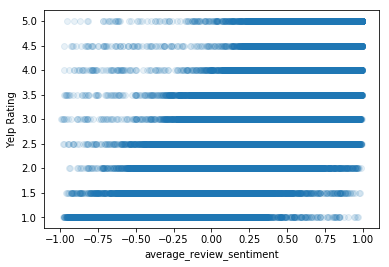

In [17]:
# plot stars against average_review_sentiment here
plt.scatter(df['average_review_sentiment'],df['stars'],alpha=0.1)
plt.xlabel('average_review_sentiment')
plt.ylabel('Yelp Rating')
plt.show()

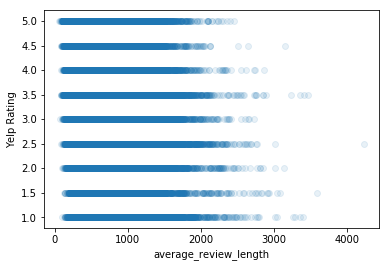

In [18]:
# plot stars against average_review_length here
plt.scatter(df['average_review_length'],df['stars'],alpha=0.1)
plt.xlabel('average_review_length')
plt.ylabel('Yelp Rating')
plt.show()

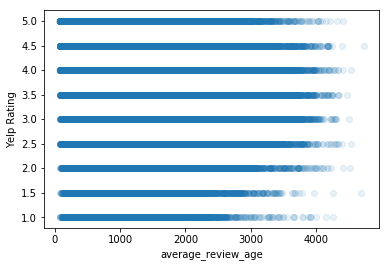

In [19]:
# plot stars against average_review_age against stars here
plt.scatter(df['average_review_age'],df['stars'],alpha=0.1)
plt.xlabel('average_review_age')
plt.ylabel('Yelp Rating')
plt.show()

### 3.3 Data Selection 

Again, the three features with the strongest correlations to Yelp rating are `average_review_sentiment`, `average_review_length`, and `average_review_age`.

Let's use this knowledge to create our first model with `average_review_sentiment`, `average_review_length`, and `average_review_age` as features.

In [20]:
features = df[['average_review_sentiment','average_review_length','average_review_age']]
ratings = df['stars']

### 3.4 Split the Data into Training and Testing Sets

Before we can create a model, our data must be separated into a training set and a test set.


In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

### 3.5 Create and Train the Model

First we need to import `LinearRegression` from scikit-learn's `linear_model` module.

In order to train our model, we will create an instance of the `LinearRegression` Class, and then use the `.fit()` method on this instance.

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 3.6 Evaluate Model

The effectiveness of our model can be determined with the `.score()` method, which provides the R^2 value for our model. R^2 values range from `0` to `1`, with `0` indicating that **0% of the variability in y can be explained by x**, and with `1` indicating the **100% of the variability in y can be explained by x**. Let's use the `.score()` method on our training and testing sets.

In [23]:
model.score(X_train,y_train)

0.6520510292564032

In [24]:
model.score(X_test,y_test)

0.6495675480094902

We can use `.coef_` to generate an array of the feature coefficients determined by fitting our model to the training data. Let's list the feature coefficients in descending order.

In [25]:
sorted(list(zip(['average_review_sentiment','average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_sentiment', 2.243030310441708),
 ('average_review_length', -0.0005978300178804348),
 ('average_review_age', -0.00015209936823152394)]

### 3.7 Data Visualization Pt 2: Scatterplot Predictions

Another way to determine the reliability of the model is to calculate the predicted Yelp ratings for our testing data and compare them to their actual Yelp ratings. We will use a scatterplot to plot `Predicted Yelp Rating` against the actual `Yelp Rating`.

We can use the `.predict()` method to use model's coefficients to calculate the predicted Yelp rating.

In [26]:
y_predicted = model.predict(X_test)

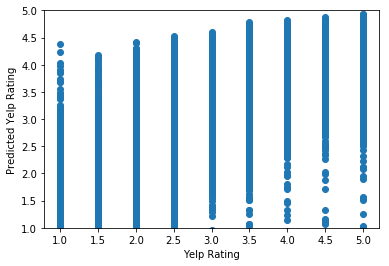

In [27]:
plt.scatter(y_test,y_predicted)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.ylim(1,5)
plt.show()

### 3.8 Future Modeling

Let's explore the previous process with a new set of features. Instead of re-doing this entire process every time we'd like to change our list of features, we can create a function instead:

In [28]:
# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    # define ratings and features, with the features limited to our chosen subset of data
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
    # perform train, test, split on the data
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # if only one feature is modeled, reshape data to prevent errors
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # create and fit the model to the training data
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # print the train and test scores
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # calculate the predicted Yelp ratings from the test data
    y_predicted = model.predict(X_test)
    
    # plot the actual Yelp Ratings vs the predicted Yelp ratings for the test data
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Let's use this function on a new set of features.

Train Score: 0.012223180709591164
Test Score: 0.010119542202269072
[('has_bike_parking', 0.19003008208039676), ('alcohol?', -0.14549670708138332), ('has_wifi', -0.13187397577762547), ('good_for_kids', -0.08632485990337231), ('takes_credit_cards', 0.07175536492195614), ('take_reservations', 0.04526558530451594)]


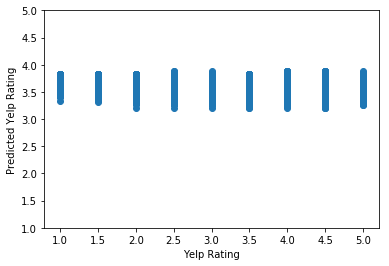

In [30]:
# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

# create a model on all binary features here
model_these_features(binary_features)

Train Score: 0.673499259376666
Test Score: 0.6713318798120138
[('average_review_sentiment', 2.2721076642097686), ('price_range', -0.0804608096270259), ('average_number_years_elite', -0.07190366288054195), ('average_caption_length', -0.00334706600778316), ('number_pics', -0.0029565028128950613), ('number_tips', -0.0015953050789039144), ('number_cool_votes', 0.0011468839227082779), ('average_number_fans', 0.0010510602097444858), ('average_review_length', -0.0005813655692094847), ('average_tip_length', -0.0005322032063458541), ('number_useful_votes', -0.00023203784758702592), ('average_review_count', -0.00022431702895061526), ('average_review_age', -0.0001693060816507226), ('average_days_on_yelp', 0.00012878025876700503), ('weekday_checkins', 5.918580754475574e-05), ('weekend_checkins', -5.518176206986478e-05), ('average_number_friends', 4.826992111594799e-05), ('review_count', -3.48348376378989e-05), ('number_funny_votes', -7.884395674183897e-06)]


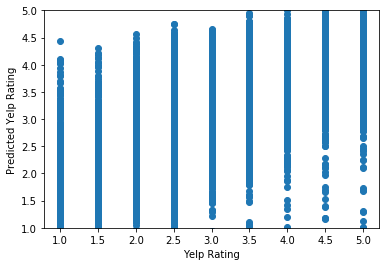

In [31]:
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

# create a model on all numeric features here
model_these_features(numeric_features)

Train Score: 0.6807828861895333
Test Score: 0.6782129045869245
[('average_review_sentiment', 2.280845699662378), ('alcohol?', -0.14991498593470778), ('has_wifi', -0.12155382629262777), ('good_for_kids', -0.11807814422012647), ('price_range', -0.06486730150041178), ('average_number_years_elite', -0.0627893971389538), ('has_bike_parking', 0.027296969912285574), ('takes_credit_cards', 0.02445183785362615), ('take_reservations', 0.014134559172970311), ('number_pics', -0.0013133612300815713), ('average_number_fans', 0.0010267986822657448), ('number_cool_votes', 0.000972372273441118), ('number_tips', -0.0008546563320877247), ('average_caption_length', -0.0006472749798191067), ('average_review_length', -0.0005896257920272376), ('average_tip_length', -0.00042052175034057535), ('number_useful_votes', -0.00027150641256160215), ('average_review_count', -0.00023398356902509327), ('average_review_age', -0.00015776544111326904), ('average_days_on_yelp', 0.00012326147662885747), ('review_count', 0.00

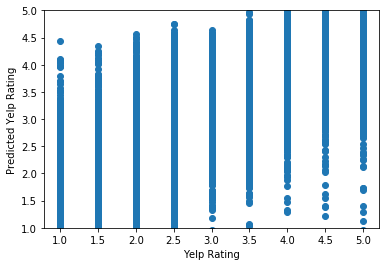

In [32]:
# all features
all_features = binary_features + numeric_features

# create a model on all features here
model_these_features(all_features)

### 3.9 Prediction of a Hypothetical Restaurant 

Let's create a hypothetical restaurant and predict its Yelp Rating. First, let's recall what are features are.

In [33]:
print(all_features)

['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi', 'review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']


For some perspective on preexisting restaurants, let's calculate the mean, minimum, and maximum values for each feature.

In [34]:
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,average_review_sentiment,0.554935,-0.995200,0.996575
1,average_review_length,596.463567,62.400000,4229.000000
2,average_review_age,1175.501021,71.555556,4727.333333


Let's call our hypothetical restaurant `Adrian's Taco Shop` and assign this taco shop reasonable values for each feature.

In [36]:
adrians_taco_shop = np.array([1,1,1,1,1,1,75,2,3,10,10,1200,0.95,3,6,10,50,3,50,500,20,100,1,0,0]).reshape(1,-1)

Before we make a prediction, let's retrain our model on all our features.

In [38]:
#retrain model on all features
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Finally, let's make our Yelp rating prediction on `Adrian's Taco Shop`!

In [39]:
model.predict(adrians_taco_shop)

array([3.82929417])

3.8 stars, huh....... Not too bad, I guess.

# 4 Discussion & Conclusion

We were able to build a Multiple Linear Regression model with the capability to *somewhat predict* a restaurant's Yelp rating. Although we obtained our highest `Test Score` of `0.6713318798120138` when modeling all available features, this test score was not much higher than when we  modeled only numeric features or our top 3 features.

This project demonstrated that even if a plethora of data is available, it can still be difficult to make predictions. Additonally, I learned how initial analysis can provide valuable insight for future projects.

For example, because we determined that `average_review_sentiment` has the strongest correlation with Yelp rating; it might be worth further investigating how "sentiment" is determined by using Natural Language Processing techniques. (More on NLP soon!)